# DS-SF-34 | 04 | Exploratory Data Analysis | Assignment | Starter Code

## Exploratory Data Analysis on the Advertising Dataset

You've been hired as a Data Science Consultant to provide advice to a client on how to improve sales of a particular product.  This client provided you with a dataset (the `Advertising` Dataset) consisting of the `Sales` of that product (in thousands
of units) in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: `TV`, `Radio`, and `Newspaper` (in thousands of dollars).<sup>(*)</sup>

In this assignment, we are going to do some basic exploratory data analysis.  We will revisit this dataset in later assignments.

<sup>(*)</sup> Source: An Introduction to Statistical Learning with Applications in R

In [2]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-04-advertising-starter.csv'))

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


> ## Question 1.  Make some boxplots!
> E.g., `df[ ['column(s) of interest'] ].plot(kind = 'box')`

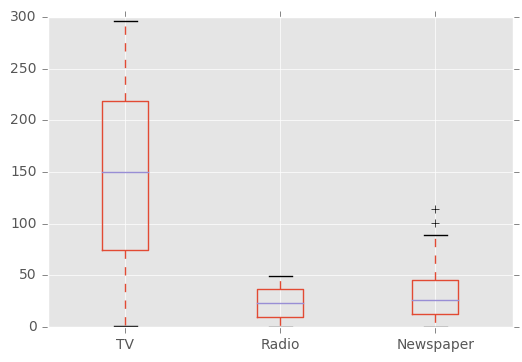

In [5]:
df[['TV', 'Radio','Newspaper']].plot(kind ='box')

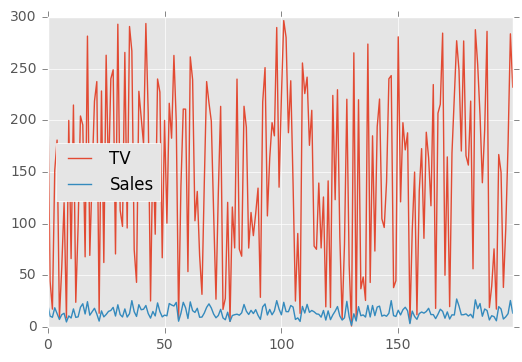

In [18]:
df[['TV', 'Sales']].plot(kind ='line')

> ## Question 2.  What do we learn from TV, radio, newspaper and sales boxplots?

TV is the most expensive but also has the greatest number of sales. There are several outliers in the Newspaper dataset. Radio and Newspaper have similar medians. 

There is a large spred of the middle interquartile range in TV. 

Q3 + 1.5 IQR. Last normal point outside the normal. 

> ## Question 3.  Let's play with correlation!  Compute the correlation matrix of your data and explain what you've learned from it.  E.g., which variable can depict sales the best?  (TV, radio or newspaper)  What are the highest and lowest correlations?  What did you learn from the correlation matrix?

In [14]:
#TV most highly predicts sales 

df.corr(method='pearson', min_periods=1)['TV']


TV           1.000000
Radio        0.054809
Newspaper    0.056648
Sales        0.782224
Name: TV, dtype: float64

In [8]:
#Newspaper has the lowest coorelation with sales 

df.corr(method='pearson',min_periods=1)['Newspaper']

TV           0.056648
Radio        0.354104
Newspaper    1.000000
Sales        0.228299
Name: Newspaper, dtype: float64

In [9]:
df.corr(method='pearson',min_periods=1)['Radio']

TV           0.054809
Radio        1.000000
Newspaper    0.354104
Sales        0.576223
Name: Radio, dtype: float64

Answer: TODO

In [ ]:
TV has big range. 

## Let's get rid of outliers!

Directions:

1. Look over your boxplots and pick one variable that likely has outliers.
2. Find the Interquartile Range (IQR) of that variable.  You can do this in two different ways.
  - Use `df.describe()`
  - Use `df.quantile()`
3. Remember, one definition for outliers is anything that is more than `1.5 * IQR` above Q3 or `1.5 * IQR` below Q1.
4. Delete the rows for these outliers.

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.quantile()

TV           149.75
Radio         22.90
Newspaper     25.75
Sales         12.90
dtype: float64

> ## Question 4.  Step 1:  Which variable seems to have outliers?

Answer: TODO

In [ ]:
# Newspaper has outliers. 

> ## Question 5.  Step 2: Compute the IQR

In [17]:
#ALANA go back and reread this info

Q1 = df.Newspaper.quantile(0.25)
Q3 = df.Newspaper.quantile(.75)

IQR = Q3 - Q1

IQR

32.350000000000001

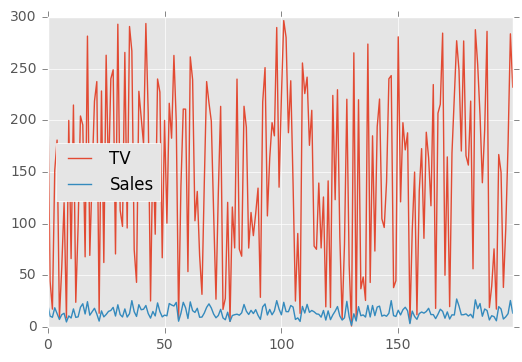

> ## Question 6.  Steps 3 and 4: Remove the outliers

In [19]:
df.shape[0]

200

In [20]:
#no outliers under Q!
df[df.Newspaper < Q1 - 1.5 * IQR].shape[0]

0

In [22]:
df[df.Newspaper < Q3 + 1.5 * IQR]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [23]:
df.drop(df[df.Newspaper > Q3 +1.5 * IQR].index, inplace=True)

In [27]:
#how many rows have i got now?
df.shape[0]

198

> ## Question 7.  Your last mission!  Our goal is to divide our dataset to high and low sales.  We would like to add a binary variable called `Sales_High` which is 1 if sales of that specific observation is above the median of all sales and 0 otherwise.

In [28]:
#MY NAIVE ATTEMPT
#df.median()

#if df.TV > 149.75 

TV           149.75
Radio         22.40
Newspaper     25.60
Sales         12.90
dtype: float64

In [30]:
threshold = df.Sales.median()

df['Sales_High'] = df.Sales.apply(lambda sales: (sales > threshold) * 1)


In [31]:
df

,TV,Radio,Newspaper,Sales,Sales_High
0,230.1,37.8,69.2,22.1,1
1,44.5,39.3,45.1,10.4,0
2,17.2,45.9,69.3,9.3,0
3,151.5,41.3,58.5,18.5,1
4,180.8,10.8,58.4,12.9,0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,0
196,94.2,4.9,8.1,9.7,0
197,177.0,9.3,6.4,12.8,0
198,283.6,42.0,66.2,25.5,1


> ## Question 8.  Save the dataset as `dataset-04-advertising.csv` in the `datasets` folder.

In [33]:
df.to_csv(os.path.join('..','dataset-04-advertising.csv'))